In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import warnings
warnings.filterwarnings('ignore')
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [89]:
dftrain = pd.read_csv('../input/train.csv')
dftrain = dftrain[dftrain.columns[(dftrain.dtypes=='int64')|(dftrain.dtypes=='float64')]]
dftrain.drop(['Id','YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)
dftrain = dftrain.dropna(axis=0,how='any').reset_index(drop=True)
dftrain = dftrain[['MSSubClass','LotFrontage','LotArea','OverallQual','BsmtFinSF1','BsmtUnfSF']]
print(dftrain.shape)
dftrain.head()

(1121, 6)


,MSSubClass,LotFrontage,LotArea,OverallQual,BsmtFinSF1,BsmtUnfSF
0,60,65.0,8450,7,706,150
1,20,80.0,9600,6,978,284
2,60,68.0,11250,7,486,434
3,70,60.0,9550,7,216,540
4,60,84.0,14260,8,655,490


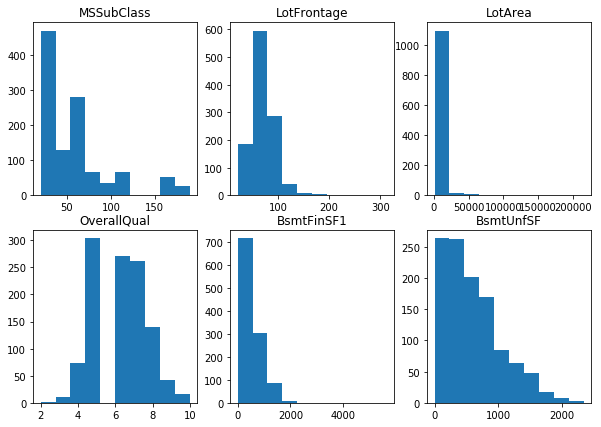

In [90]:
plt.figure(figsize=(10, 7))
for i in range(len(dftrain.columns.values)):    
    plt.subplot(2,3,i+1)
    plt.hist(dftrain[dftrain.columns.values[i]])
    plt.title(dftrain.columns.values[i])
plt.show()

In [91]:
from itertools import combinations
feature_combination = list(combinations(['MSSubClass','LotFrontage','LotArea','OverallQual','BsmtFinSF1','BsmtUnfSF'],2))
print(len(feature_combination))
print(feature_combination)

15
[('MSSubClass', 'LotFrontage'), ('MSSubClass', 'LotArea'), ('MSSubClass', 'OverallQual'), ('MSSubClass', 'BsmtFinSF1'), ('MSSubClass', 'BsmtUnfSF'), ('LotFrontage', 'LotArea'), ('LotFrontage', 'OverallQual'), ('LotFrontage', 'BsmtFinSF1'), ('LotFrontage', 'BsmtUnfSF'), ('LotArea', 'OverallQual'), ('LotArea', 'BsmtFinSF1'), ('LotArea', 'BsmtUnfSF'), ('OverallQual', 'BsmtFinSF1'), ('OverallQual', 'BsmtUnfSF'), ('BsmtFinSF1', 'BsmtUnfSF')]


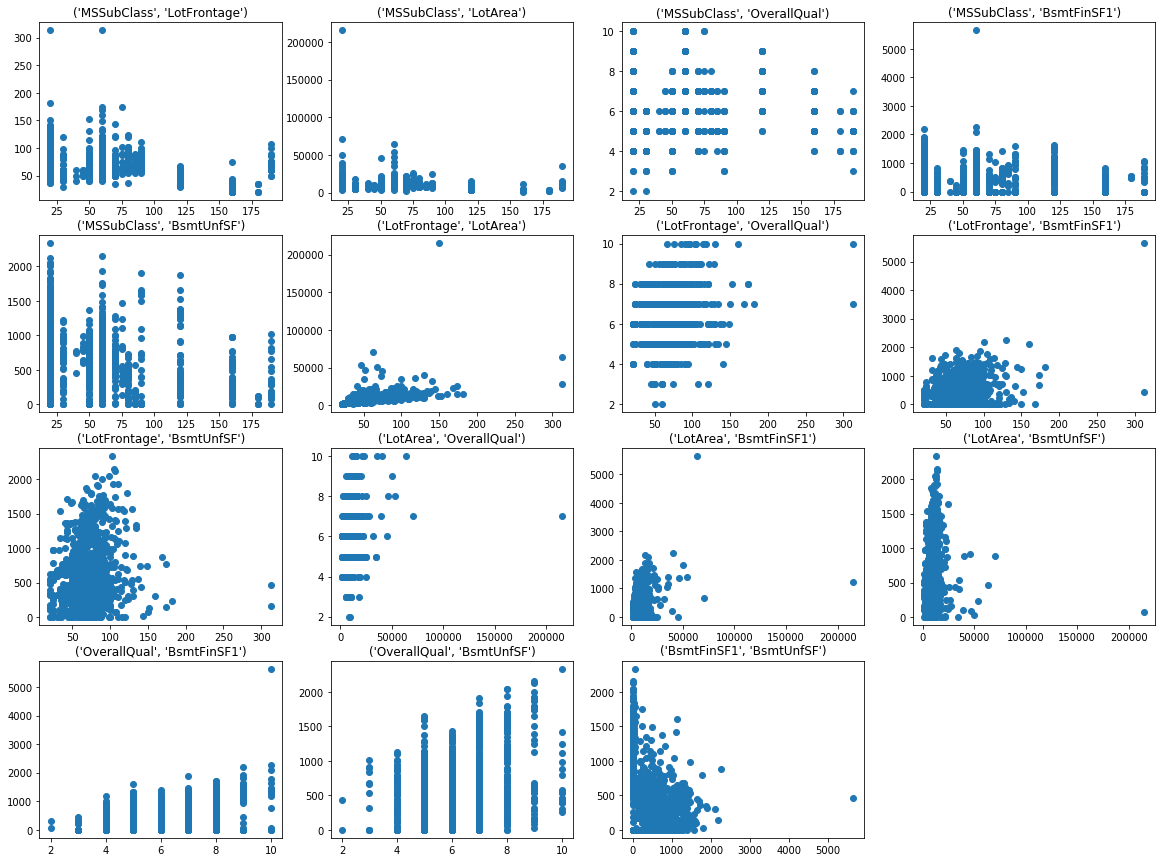

In [92]:
plt.figure(figsize=(20, 15))
for i in range(len(feature_combination)):
    plt.subplot(4,4,i+1)
    plt.scatter(dftrain[feature_combination[i][0]],dftrain[feature_combination[i][1]])
    plt.title(feature_combination[i])
plt.show()

In [93]:
def generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9):
    
    plt.figure(figsize=(15, 10))
    
    # centroids base ---------------
    #kmeans
    plt.subplot(3,3,1)
    from sklearn.cluster import KMeans
    outcluters = KMeans(n_clusters=n_clusters, random_state=0).fit(dfcluster)
    #kmeans.labels_
    #kmeans.inertia_ 
    #kmeans.cluster_centers_
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('kmeans')
    del outcluters


    #MiniBatchKMeans
    plt.subplot(3,3,2)
    from sklearn.cluster import MiniBatchKMeans
    outcluters = MiniBatchKMeans(n_clusters=n_clusters).fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('MiniBatchKMeans')
    del outcluters


    #Birch
    plt.subplot(3,3,3)
    '''
    an alternative to MiniBatchKMeans
    '''
    from sklearn.cluster import Birch
    outcluters = Birch(n_clusters=n_clusters,threshold=threshold).fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('Birch')
    del outcluters


    #MeanShift
    plt.subplot(3,3,4)
    '''
    Mean shift clustering aims to discover “blobs” in a smooth density of samples. 
    It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region.
    '''
    from sklearn.cluster import MeanShift,estimate_bandwidth
    bandwidth = estimate_bandwidth(dfcluster, quantile=.4)
    outcluters = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('MeanShift')
    del outcluters


    #affinity
    plt.subplot(3,3,5)
    '''
    affinity is the adjacency matrix of a graph
    '''
    from sklearn.cluster import AffinityPropagation
    outcluters = AffinityPropagation(damping=damping).fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('affinity')
    del outcluters


    #AgglomerativeClustering
    plt.subplot(3,3,6)
    from sklearn.cluster import AgglomerativeClustering
    outcluters = AgglomerativeClustering(n_clusters=n_clusters).fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('AgglomerativeClustering')
    del outcluters


    # SpectralClustering
    plt.subplot(3,3,7)
    '''
    can be used to find normalized graph cuts
    In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster.
    '''
    from sklearn.cluster import SpectralClustering
    outcluters = SpectralClustering(n_clusters=n_clusters,eigen_solver='arpack',affinity="nearest_neighbors").fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('SpectralClustering')
    del outcluters
    
    # density base ---------------
    # DBSCAN
    plt.subplot(3,3,8)
    from sklearn.cluster import DBSCAN
    outcluters = DBSCAN(eps=dfcluster[df_features[1]].median()).fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.labels_)
    plt.title('DBSCAN')
    del outcluters
    
    # distribution based ---------------
    # GaussianMixture
    plt.subplot(3,3,9)
    from sklearn.mixture import GaussianMixture
    outcluters = GaussianMixture(n_components=n_clusters,covariance_type='full').fit(dfcluster)
    plt.scatter(dfcluster[df_features[0]],dfcluster[df_features[1]], c=outcluters.predict(dfcluster))
    plt.title('GaussianMixture')
    del outcluters
    
    plt.show()

## apply sample data

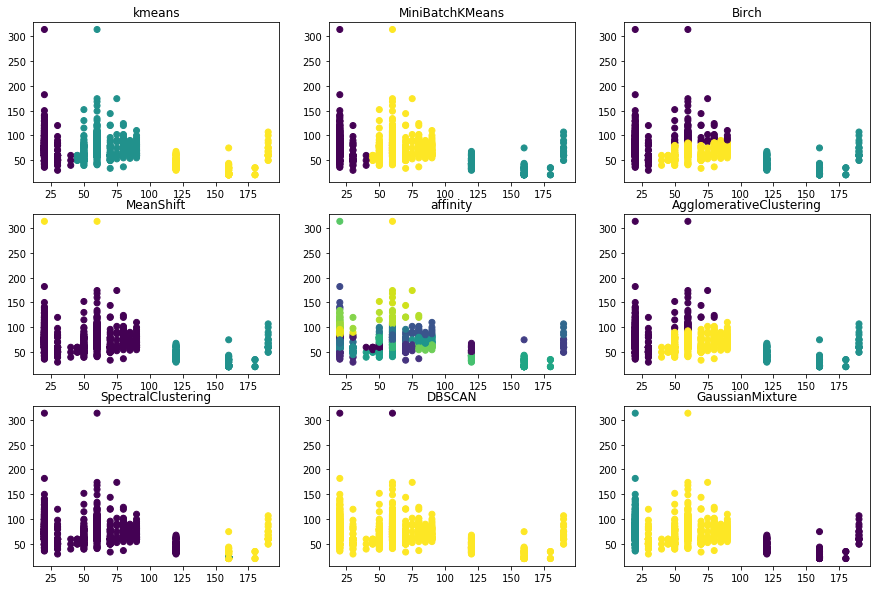

In [94]:
df_features = ['MSSubClass','LotFrontage']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

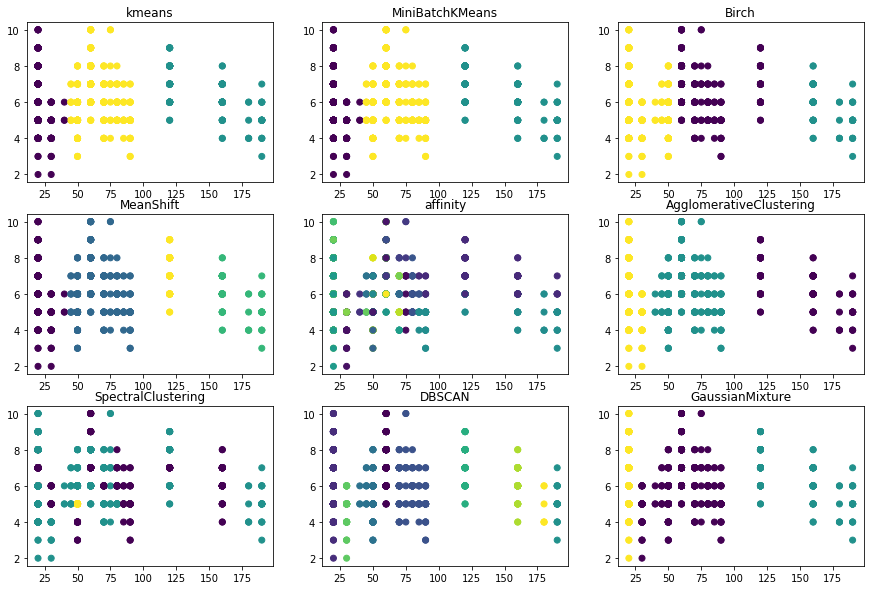

In [95]:
df_features = ['MSSubClass', 'OverallQual']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

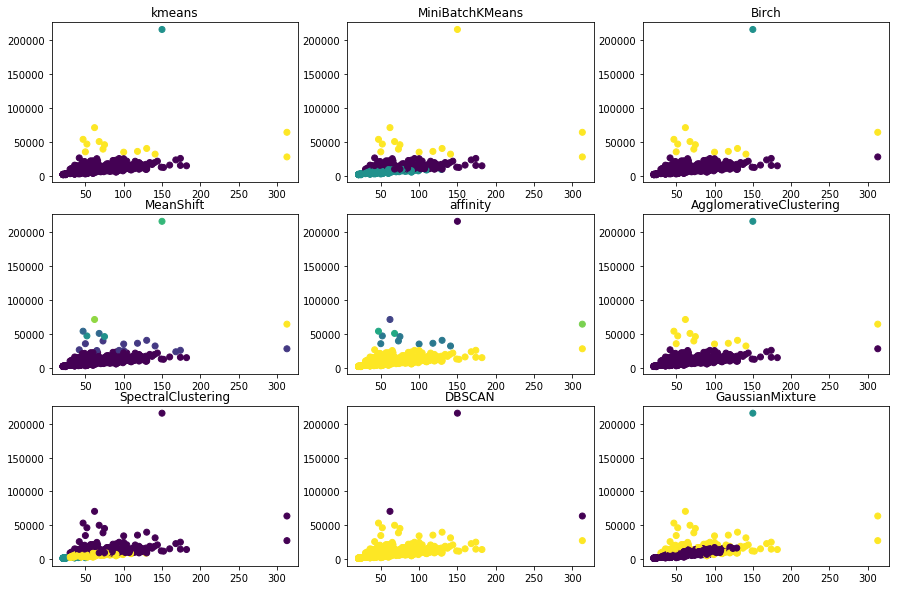

In [96]:
df_features = ['LotFrontage', 'LotArea']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

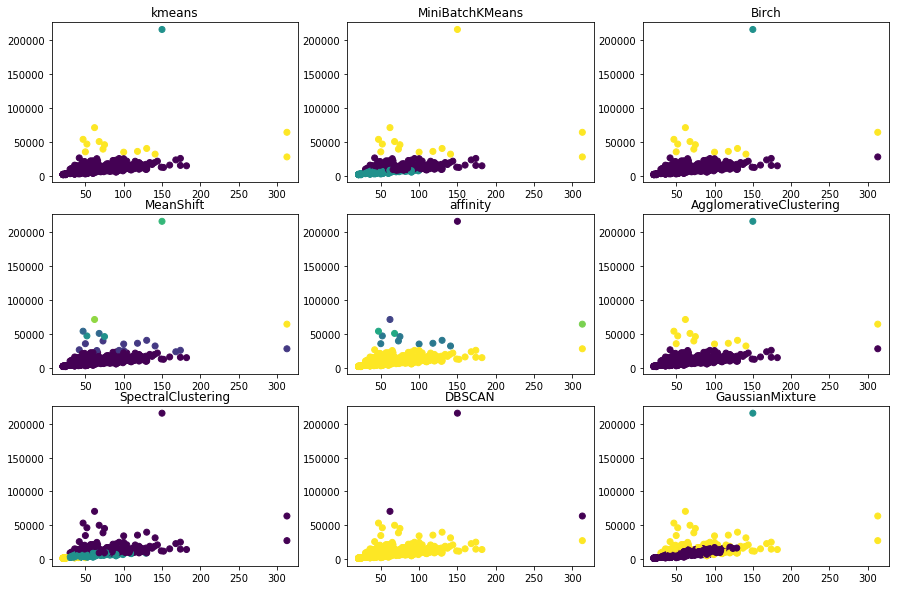

In [97]:
df_features = ['LotFrontage', 'LotArea']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

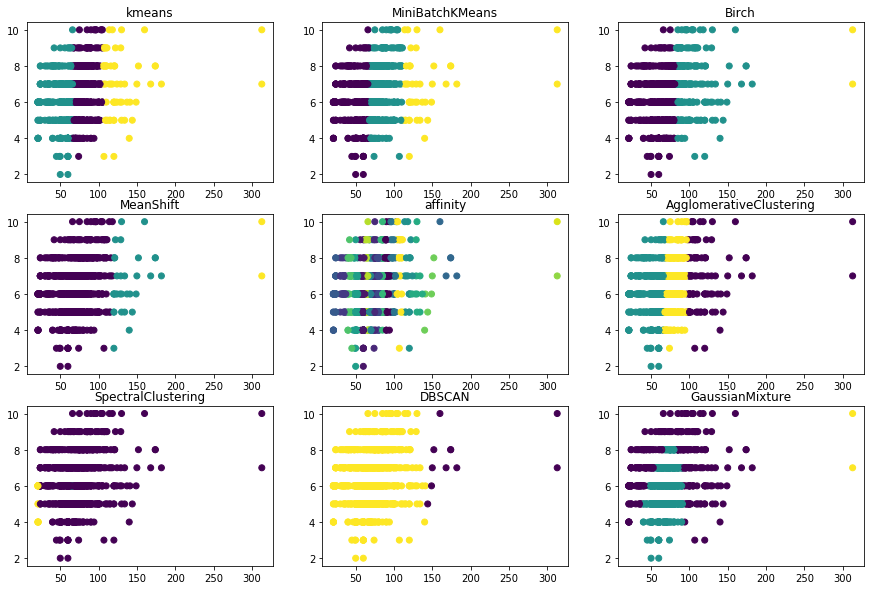

In [98]:
df_features = ['LotFrontage', 'OverallQual']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

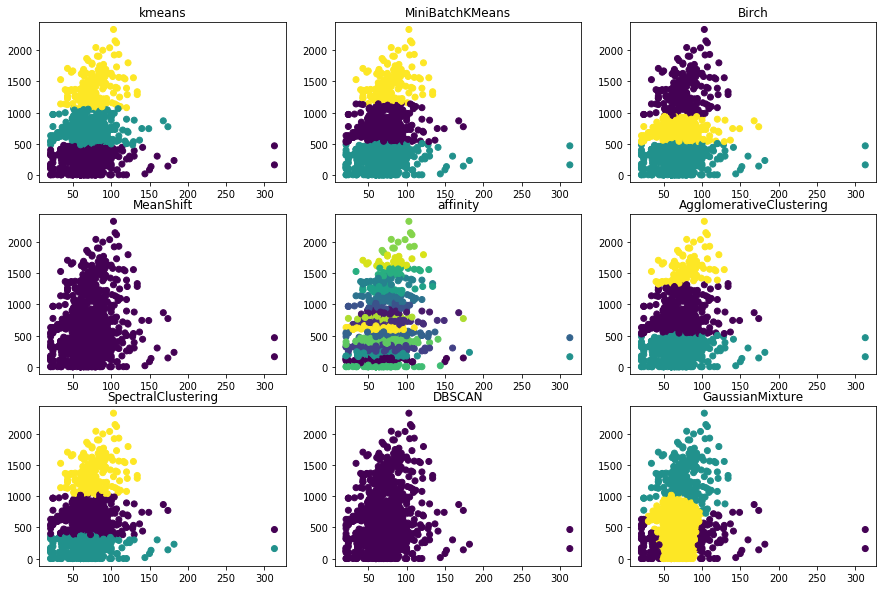

In [99]:
df_features = ['LotFrontage', 'BsmtUnfSF']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

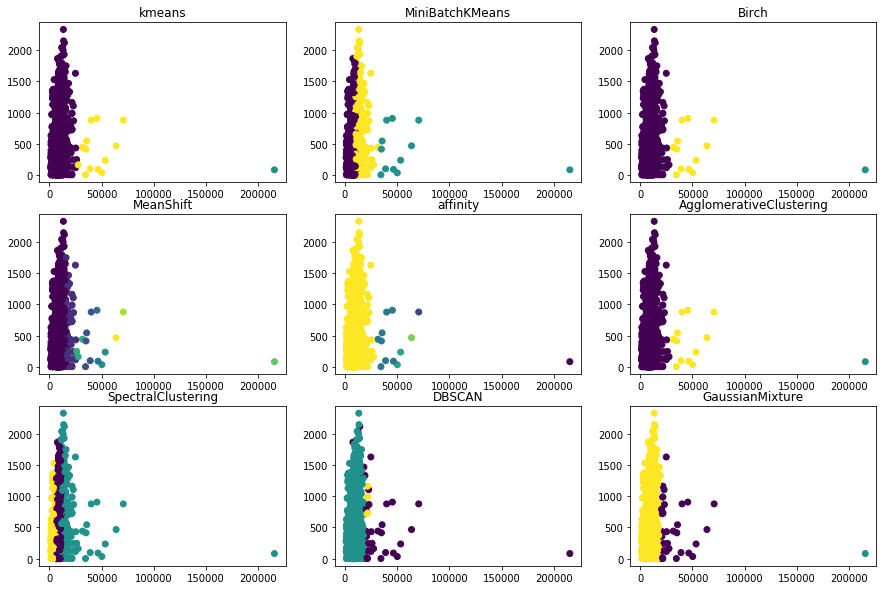

In [100]:
df_features = ['LotArea', 'BsmtUnfSF']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

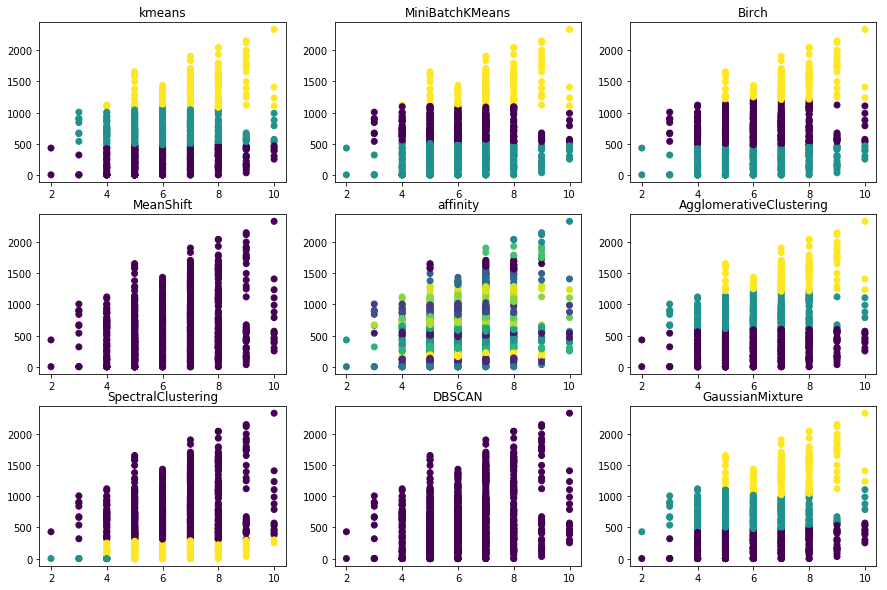

In [101]:
df_features = ['OverallQual', 'BsmtUnfSF']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]

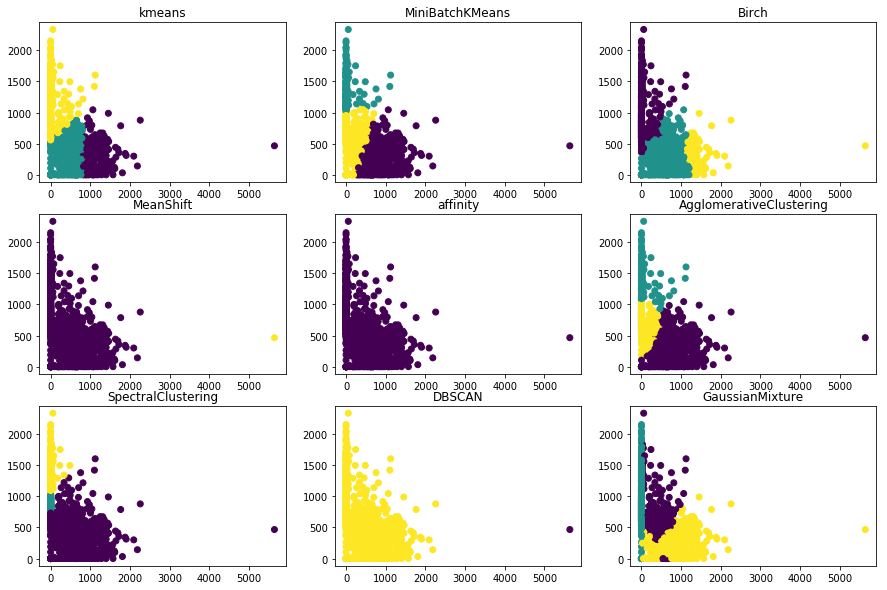

In [102]:
df_features = ['BsmtFinSF1', 'BsmtUnfSF']
dfcluster = dftrain[df_features].copy()
generate_clusters(dfcluster,n_clusters=3,threshold=.2,damping=.9)
del [df_features,dfcluster]